# Trabalho Final de Introdução à Computação Numérica (2025.2)

**Dupla:**
* Daniel Rossano Piccoli de Oliveira
* Davi de Lacerda Iecin


## 0. Importação de Bibliotecas
Rodar esta célula para carregar as ferramentas.

```python
# Se estiver rodando no google colab, descomente a linha abaixo:
# !pip install numpy matplotlib sympy
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.abc import x
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

Gráfico e animação de teste:

In [11]:
#teste 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Configura a "tela" do gráfico
fig, ax = plt.subplots()
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.5, 1.5)
linha, = ax.plot([], [], lw=2)

# Função que inicializa o fundo (limpo)
def init():
    linha.set_data([], [])
    return linha,

# Função que desenha cada quadro (frame)
def update(frame):
    x = np.linspace(0, 2*np.pi, 100)
    y = np.sin(x - 0.1 * frame) # O frame muda a fase da onda, fazendo ela "andar"
    linha.set_data(x, y)
    return linha,

# Cria a animação
anim = FuncAnimation(fig, update, frames=100, init_func=init, blit=True)

# O COMANDO MÁGICO: Converte para HTML5 para aparecer no Notebook
plt.close() # Evita plotar uma imagem estática duplicada
HTML(anim.to_jshtml())

## 1. Método de interpolação de Lagrange:

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def interpolacao_lagrange(pontos_x, pontos_y):
    """
    Implementação do método de Lagrande.
    Entradas:
        pontos_x -> Lista com as coordenadas de x
        pontos_y -> Lista com as coordenadas de y

    Saída:
        expressao_final -> Polinômio f(x)
        funcao_numerica -> Função pronta para calcular calores e plotar
    """

    x = sp.symbols('x') 
    n = len(pontos_x)
    polinomio = 0

    for i in range(n):
        L_i = 1
        for j in range(n):
            if i != j:
                L_i = L_i * (x - pontos_x[j]) / (pontos_x[i] - pontos_x[j])

        polinomio = polinomio + pontos_y[i] * L_i

    expressao_final = sp.simplify(polinomio)

    funcao_numerica = sp.lambdify(x, expressao_final, modules=['numpy'])
    
    return expressao_final, funcao_numerica

# Problemas resolvidos com interpolação:

## Problema 1: Interpolando 3 pontos aleatórios:

O Polinômio de Lagrage f(x) é: 
     2           
  5⋅x    17⋅x    
- ──── + ──── + 1
   6      6      


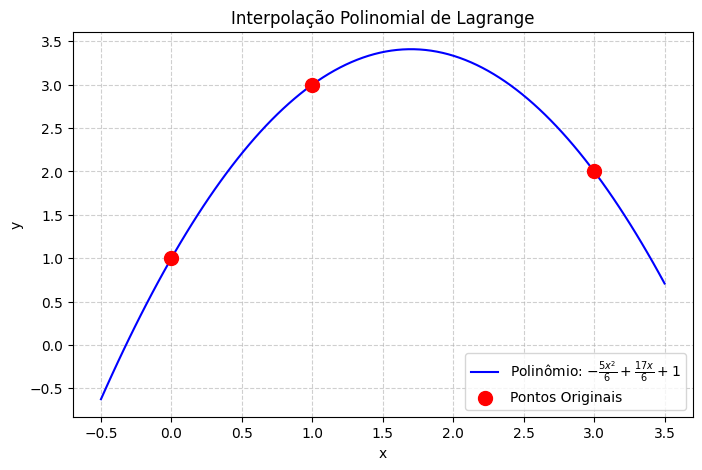

In [13]:
x_input = [0, 1, 3]
y_input = [1, 3, 2]

equacao, funcao = interpolacao_lagrange(x_input, y_input)
print("O Polinômio de Lagrage f(x) é: ")
sp.pprint(equacao)

x_plot = np.linspace(min(x_input) - 0.5, max(x_input) + 0.5, 100)
y_plot = funcao(x_plot)

plt.figure(figsize=(8, 5))
plt.plot(x_plot, y_plot, label=f'Polinômio: ${sp.latex(equacao)}$', color='blue')
plt.scatter(x_input, y_input, color='red', s=100, zorder=5, label='Pontos Originais')
plt.title("Interpolação Polinomial de Lagrange")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()